In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import requests as rq
import pandas as pd
import time
import os
import pprint
import json as js
import matplotlib
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

from google.colab import auth
import gspread
from google.auth import default

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Numbers of plants in each folder

In [26]:
root_path = '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train'
folders = os.listdir(root_path)

folders = sorted(folders, reverse=1)
ind = 1
n_totl = 0
catergories = []
sample_size = []
pick_imgs = list()

print(f'We have {len(folders)} kinds of houseplants')
print('-'*20)
for folder in folders:
    files = os.listdir(os.path.join(root_path, folder))
    qty = len(files)
    n_totl += qty
    catergories.append(folder.replace("_", " "))
    sample_size.append(qty)
    pick_one_img = os.path.join(root_path, folder, files[11])
    pick_imgs.append([folder, pick_one_img])
    print(f'{qty} images for {folder}')
print('-'*20)
print(f"We have {n_totl} images in total")

We have 20 kinds of houseplants
--------------------
634 images for Zamioculcas
656 images for Tradescantia_zebrina
385 images for Schefflera_arboricola
436 images for Rhapis_excelsa
272 images for Philodendron_gloriosum
326 images for Peperomia_obtusifolia
252 images for Peperomia_argyreia
189 images for Pachira_aquatica
190 images for Nephrolepis_cordifolia
845 images for Monstera_deliciosa
421 images for Maranta_leuconeura
1095 images for Hoya_carnosa
594 images for Epipremnum_aureum
454 images for Dypsis_lutescens
239 images for Dracaena_trifasciata
306 images for Dracaena_reflexa
287 images for Chamaedorea_elegans
251 images for Calathea_orbifolia
756 images for Asplenium_nidus
574 images for Aglaonema_commutatum
--------------------
We have 9162 images in total


In [27]:
# Sorted by plant names
kind_by_name = [x for x, y in sorted(zip(catergories, sample_size))]
size_by_name = [y for x, y in sorted(zip(catergories, sample_size))]

print(kind_by_name)
print(size_by_name)

['Aglaonema commutatum', 'Asplenium nidus', 'Calathea orbifolia', 'Chamaedorea elegans', 'Dracaena reflexa', 'Dracaena trifasciata', 'Dypsis lutescens', 'Epipremnum aureum', 'Hoya carnosa', 'Maranta leuconeura', 'Monstera deliciosa', 'Nephrolepis cordifolia', 'Pachira aquatica', 'Peperomia argyreia', 'Peperomia obtusifolia', 'Philodendron gloriosum', 'Rhapis excelsa', 'Schefflera arboricola', 'Tradescantia zebrina', 'Zamioculcas']
[574, 756, 251, 287, 306, 239, 454, 594, 1095, 421, 845, 190, 189, 252, 326, 272, 436, 385, 656, 634]


In [28]:
# Sorted by quantities
kind_by_qty = [y for x, y in sorted(zip(sample_size, catergories), reverse=True)]
size_by_qty = [x for x, y in sorted(zip(sample_size, catergories), reverse=True)]

print(kind_by_qty)
print(size_by_qty)

['Hoya carnosa', 'Monstera deliciosa', 'Asplenium nidus', 'Tradescantia zebrina', 'Zamioculcas', 'Epipremnum aureum', 'Aglaonema commutatum', 'Dypsis lutescens', 'Rhapis excelsa', 'Maranta leuconeura', 'Schefflera arboricola', 'Peperomia obtusifolia', 'Dracaena reflexa', 'Chamaedorea elegans', 'Philodendron gloriosum', 'Peperomia argyreia', 'Calathea orbifolia', 'Dracaena trifasciata', 'Nephrolepis cordifolia', 'Pachira aquatica']
[1095, 845, 756, 656, 634, 594, 574, 454, 436, 421, 385, 326, 306, 287, 272, 252, 251, 239, 190, 189]


## Plotting our sample bar chart

In [29]:
matplotlib.__version__

'3.5.3'

### Bar chart

In [30]:
def plot_barchart(x, y):
    # Figure Size (dpi=1200 to get higher resolution)
    fig, ax = plt.subplots(figsize =(4, 4), dpi=300)
  
    # Horizontal Bar Plot
    bars = ax.barh(x, y, color = 'darkslategray')
  
    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
  
    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Turn off x axis
    ax.axes.get_xaxis().set_visible(False)

    # Turn off all frames
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Remove gridline
    ax.grid(False)
    
    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars -- Need to update matplot to 3.4 or above
    ax.bar_label(bars, label_type = 'center', color ='white')
  
    # Add Plot Title
    ax.set_title('Sample size (Count)',
                loc ='left', )
    
    # Show Plot
    plt.show()

In [34]:
# Figures without sorting
# plot_barchart(catergories, sample_size)

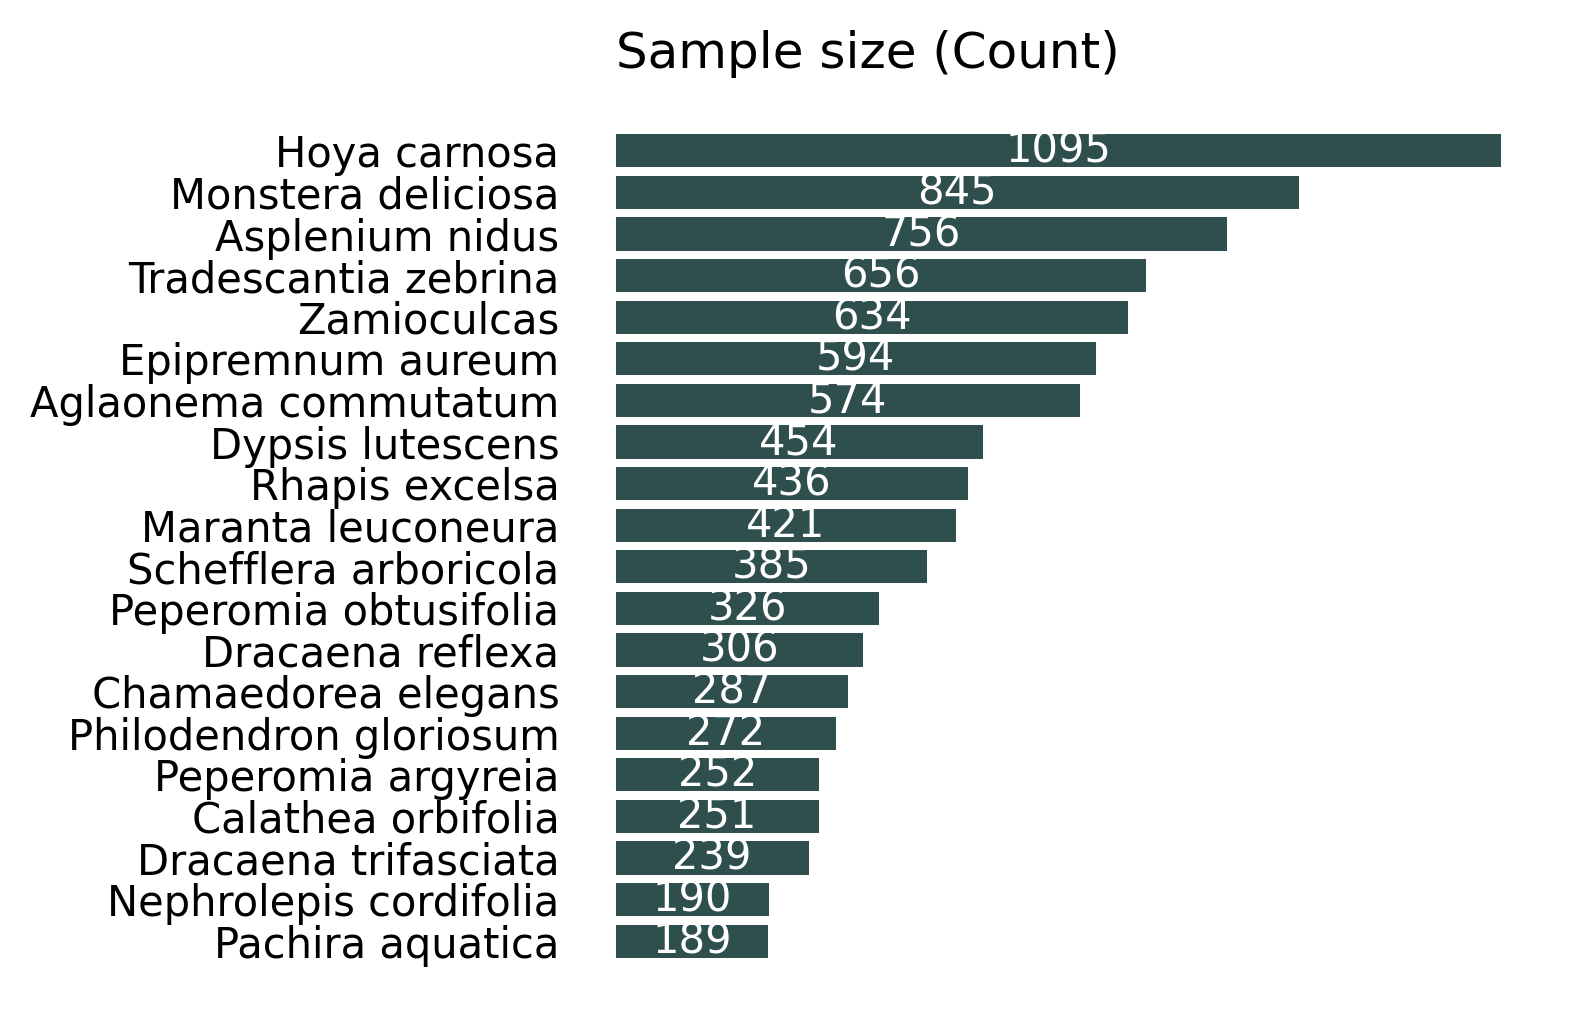

In [32]:
# Figures sorted by quantities
plot_barchart(kind_by_qty, size_by_qty)

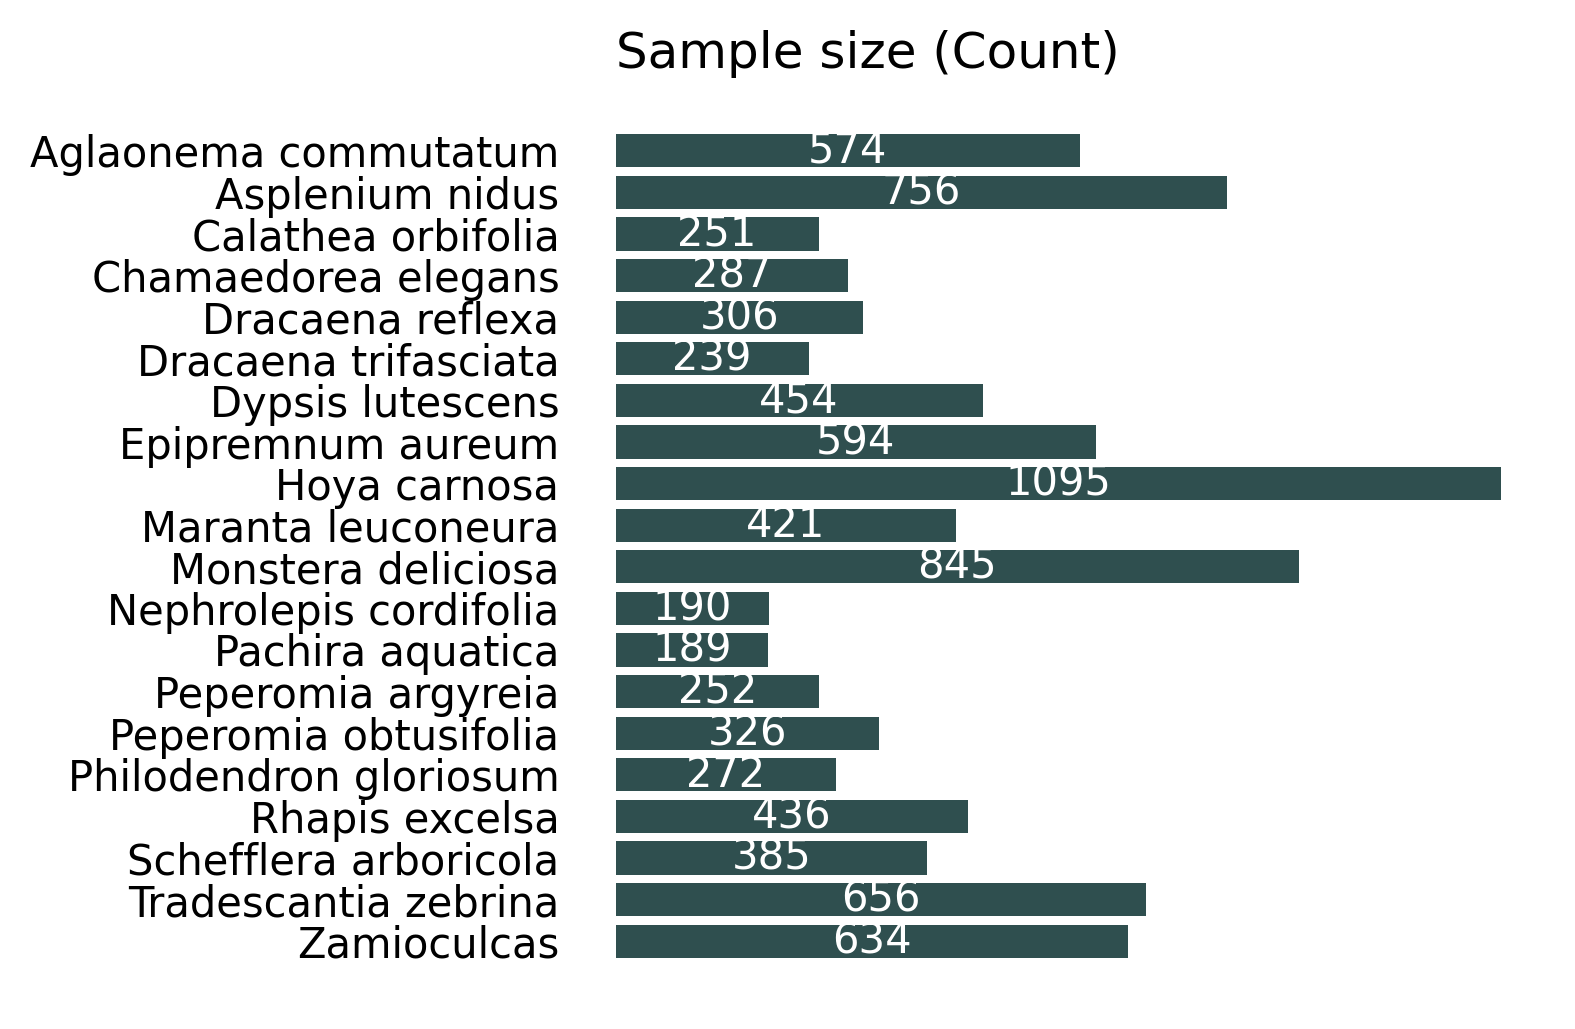

In [33]:
# Figures sorted by names
plot_barchart(kind_by_name, size_by_name)

### Plot representative houseplants

[['Aglaonema_commutatum', '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Aglaonema_commutatum/Chinese_Evergreen_12.jpg'], ['Asplenium_nidus', '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Asplenium_nidus/Nest_Fern_15.jpg'], ['Calathea_orbifolia', '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Calathea_orbifolia/Calathea_Orbifolia_14.jpg'], ['Chamaedorea_elegans', '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Chamaedorea_elegans/Chamaedorea_Elegans_12.jpg'], ['Dracaena_reflexa', '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Dracaena_reflexa/Song_of_India_Plant_19.jpg'], ['Dracaena_trifasciata', '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Dracaena_trifasciata/resize_Dracaena_trifasciata_4.jpg'], ['Dypsis_lutescens', '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Dypsis_lutescens/Areca_palm_21.jpg'], ['Epipremnum_aureum', '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Epipremnum_aureum/Pothos_14.

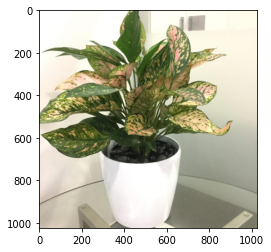

In [41]:
# Show one example
import matplotlib.image as mpimg

img = mpimg.imread(pick_imgs[0][1])
imgplot = plt.imshow(img)
plt.imshow(img)


In [36]:
from PIL import ImageOps, Image

In [37]:
# Plot all the samples

w = 15
h = 15

cw = 680
ch = 680

fig = plt.figure(figsize=(12, 15), dpi=200)
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    if i != 21:
        img = Image.open(pick_imgs[i-1][1])
        # Crop the image to square shape
        width, height = img.size
        wdif, hdif = (width - cw) // 2, (height - ch) // 2
        border = wdif, hdif, wdif, hdif  # left, top, right, bottom
        cropped_img = ImageOps.crop(img, border)
        
        fig.add_subplot(rows, columns, i)
        plt.title(pick_imgs[i-1][0], fontsize=15, color='white')
        plt.axis('off')
        plt.imshow(cropped_img)
plt.show()

Output hidden; open in https://colab.research.google.com to view.